<a href="https://colab.research.google.com/github/mrsurajramane/YT_Dataset_visualization/blob/main/DVP_CA2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES AND DATASET

In [ ]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Import the dataset using pandas dataframe

df_yt = pd.read_csv("/content/youtubers_df.csv")

# Display the first 5 records from dataset

df_yt.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# DATA CHECKING AND CLEANING IF NEEDED

In [ ]:
# Display the rows and columns

df_yt['Categories'] = df_yt['Categories'].astype(str)
df_yt.shape

(1000, 9)

In [ ]:
# Information about columns includes name, not null count & data type

df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  1000 non-null   object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [ ]:
# Check for null values (column-wise)

df_yt.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [ ]:
# Cleaning the null values by filling them with a default one

df_yt['Categories'].fillna('Unknown',inplace=True)
df_yt['Categories']

0           Música y baile
1       Videojuegos, Humor
2                Educación
3                      nan
4      Animación, Juguetes
              ...         
995                    nan
996                    nan
997         Música y baile
998                    nan
999    Noticias y Política
Name: Categories, Length: 1000, dtype: object

In [ ]:
# Check unique values for each column

df_yt.nunique()

Rank          1000
Username       994
Categories      46
Suscribers     274
Country         29
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

In [ ]:
# Check for the duplicates

duplicate_rows = df_yt[df_yt.duplicated()]
duplicate_rows

num_duplicate_rows = len(duplicate_rows)
print(num_duplicate_rows)

0


In [ ]:
# Finding categorial description of column Category

df_yt['Categories'].value_counts()

nan                                   306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor             

In [ ]:
# Finding categorial description of column Country

df_yt['Country'].value_counts()

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: Country, dtype: int64

# ➥ UNIVARIATE ANALYSIS

                            Categories  Total_Subscribers
45                                 nan       6.338000e+09
29                      Música y baile       4.293900e+09
36                Películas, Animación       1.384300e+09
5                  Animación, Juguetes       8.519000e+08
33           Música y baile, Películas       7.985000e+08
34                 Noticias y Política       6.761000e+08
6               Animación, Videojuegos       6.594000e+08
44                       Vlogs diarios       6.549000e+08
37                    Películas, Humor       6.221000e+08
20                           Educación       6.003000e+08
3                     Animación, Humor       5.612000e+08
35                           Películas       5.074000e+08
42                  Videojuegos, Humor       4.890000e+08
41                         Videojuegos       4.747000e+08
2                            Animación       3.881000e+08
25                            Juguetes       3.788000e+08
30           M

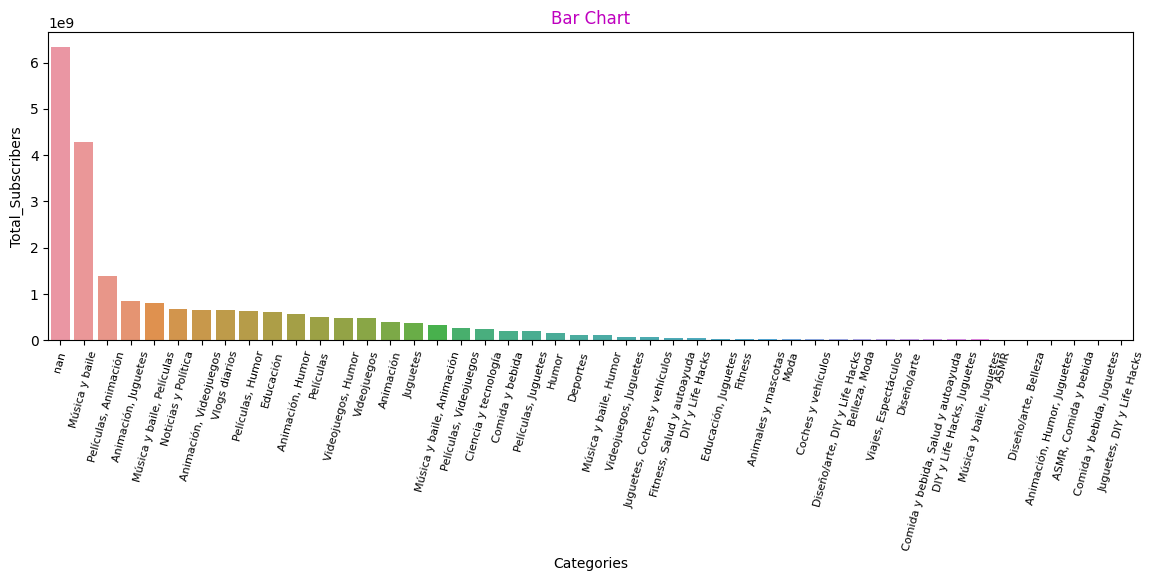

In [ ]:
# 1. What are the most popular YouTube categories?

# First calculate categories-wise subscriber count

category_subscribers = df_yt.groupby('Categories')['Suscribers'].sum().reset_index()
category_subscribers.rename(columns={'Suscribers': 'Total_Subscribers'}, inplace=True)
category_subscribers = category_subscribers.sort_values(by='Total_Subscribers', ascending=False)
print(category_subscribers)

# Bar Plot

plt.subplots(figsize=(14,4))

sns.barplot(x='Categories',y='Total_Subscribers',data=category_subscribers)
plt.xticks(rotation=75,fontsize=8)
plt.title('Bar Chart', color='m')
plt.show()

# **Insights :** From the above plotting, it is found that -
# 1. **'Music and dance'** is the most popular Youtube category followed by categories **'Movies, Animation'** and **'Animation, Toys'** based on no. of total subscribers following the channels under the same if we neglect the **'Unknown'** category which can be the sum of multiple categories.
# 2. Category **'Toys, DIY and Life Hacks'** has the least popularity on Youtube as compared with all other categories.

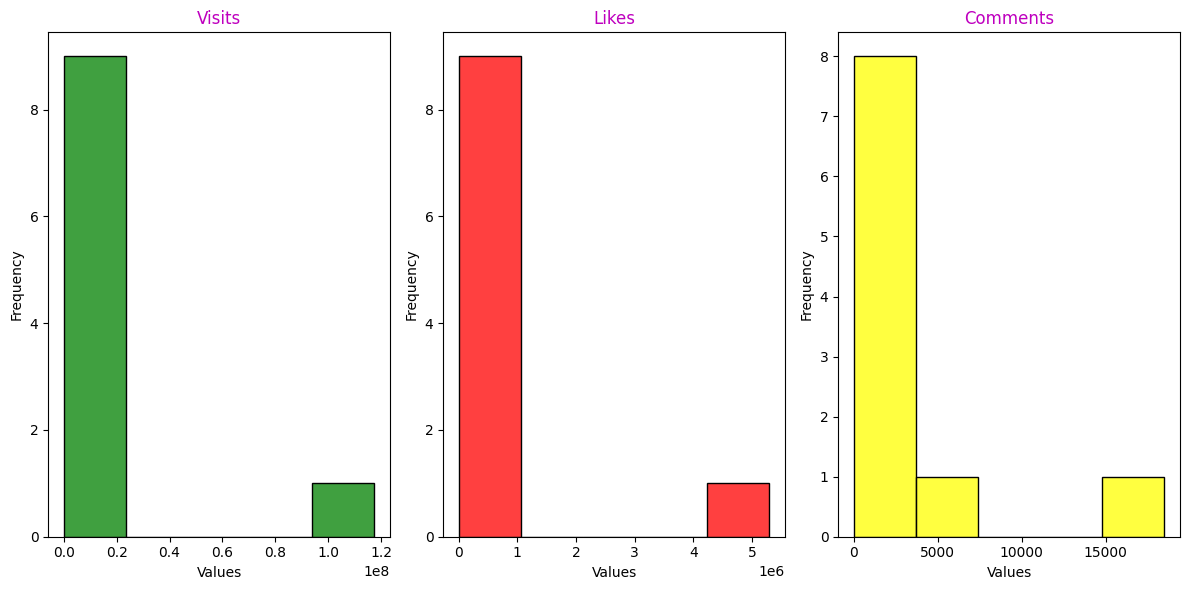

In [ ]:
# 2. What is the distribution of video visits, likes, and comments for the top-ranked channels?

# Histogram

# Considering columns 'Visits',	'Likes',	'Comments' for 1st 10 top channels
columns = ['Visits', 'Likes', 'Comments']
colors=['green','red','yellow']

# Create subplots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    sns.histplot(x=df_yt[column][:10], bins=5, color=colors[i], data=df_yt)
    plt.title(column, color='m')
    plt.xlabel("Values")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# **Insights :** From the above histograms, it can be said that -
# 1. Only 1 youtube channel among top 10 has max-regular channel videos' visits and remaining are lagging behind in reach comparatively.
# 2. Same scenario is seen in likes histogram chart that one among 10 channels have majority of likes when compared with others.
# 3. There are often less comments on the videos of youtubers whether they are popular or not and only few channels have captivated audiences to comment on their videos regularly.

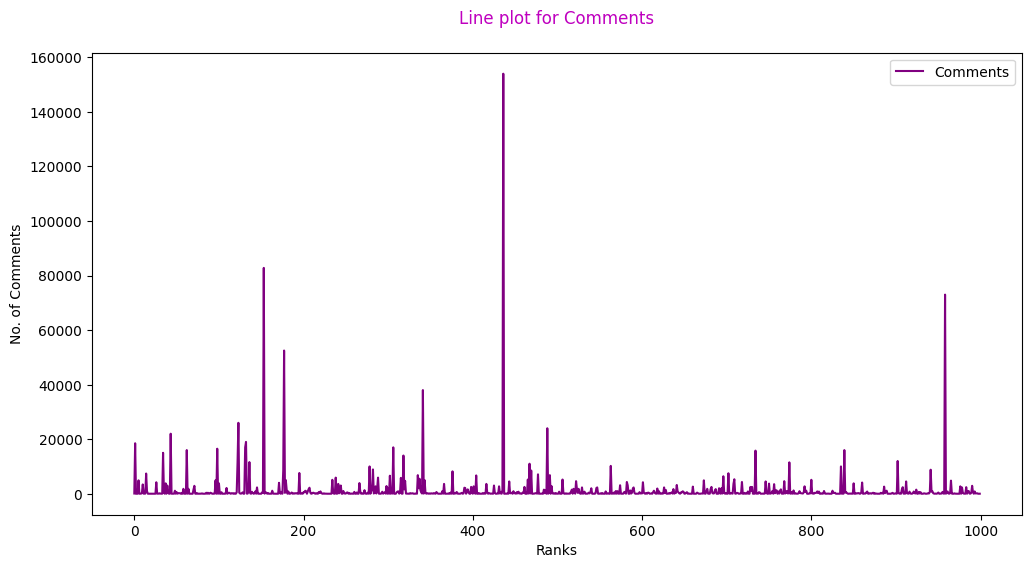

In [ ]:
# 3. What are the trends for average commments on a youtuber's video?

# Line Plot

plt.figure(figsize=(12, 6))

plt.plot(df_yt['Comments'],color='purple',label='Comments')
plt.xlabel('Ranks')
plt.ylabel('No. of Comments')
plt.title('Line plot for Comments\n',color='m')
plt.legend()
plt.show()


# **Insights :**
# Comments are less in numbers for top ranked channels' videos and higher for some channels which are less popular suggesting that they have no such fixed relation with youtuber's videos.

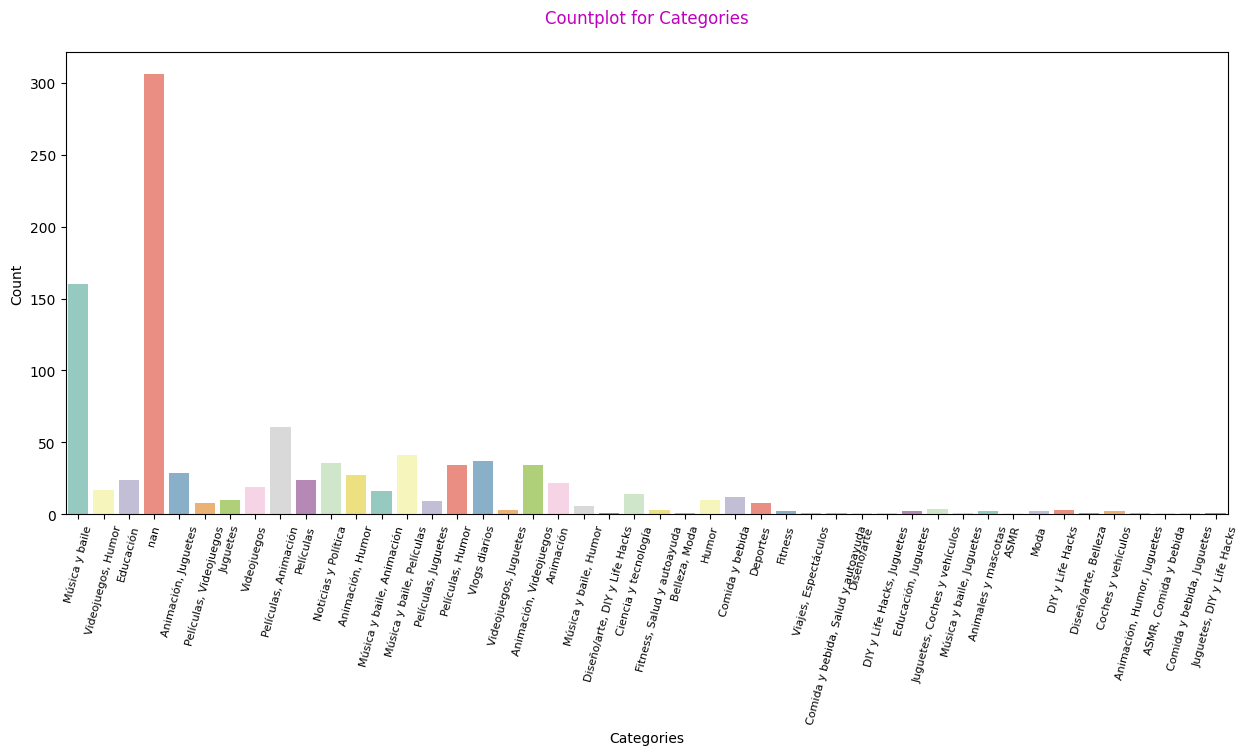

In [ ]:
# 4. What is the popularity of a category based on its frequency range?

# Count Plot

plt.figure(figsize=(15, 6))

sns.countplot(x=df_yt['Categories'], palette="Set3")
plt.title("Countplot for Categories\n",color='m')
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=75,fontsize=8)
plt.show()

# **Insights :** Same as of Bar Chart of Univariate Analysis but only difference here is that this is based on count or frequency of a category.

# ➥ BIVARIATE ANALYSIS

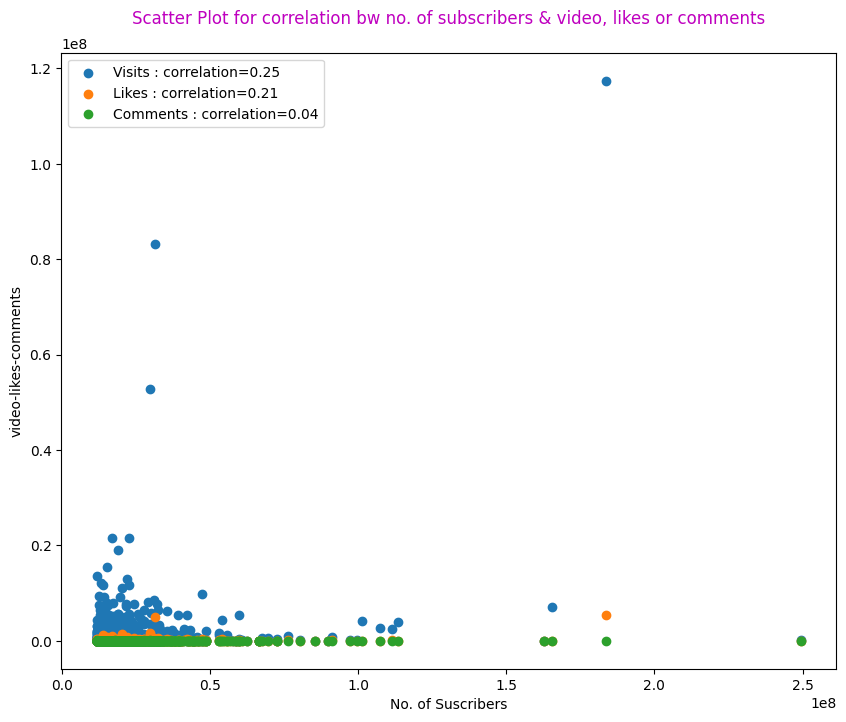

In [ ]:
# 5. Are there any correlations between the number of subscribers and video, likes or comments?

# Scatter Plot

plt.figure(figsize=(10, 8))

x=df_yt['Suscribers']
y1=df_yt['Visits']
y2=df_yt['Likes']
y3=df_yt['Comments']

plt.scatter(x,y1,label=f"Visits : correlation={np.round(np.corrcoef(x,y1)[0,1],2)}")
plt.scatter(x,y2,label=f"Likes : correlation={np.round(np.corrcoef(x,y2)[0,1],2)}")
plt.scatter(x,y3,label=f"Comments : correlation={np.round(np.corrcoef(x,y3)[0,1],2)}")
plt.xlabel("No. of Suscribers")
plt.ylabel("video-likes-comments")
plt.title("Scatter Plot for correlation bw no. of subscribers & video, likes or comments\n", color='m')
plt.legend()
plt.show()

# **Insights :**
# 1. Visits show little correlation w.r.t. Subscribers which can be said to be positive with some outliers.
# 2. Nearly no correlation of Likes w.r.t Subscribers but still have some outliers.
# 3. There is no correlation between Comments & Subscribers which has now confirmed since the histogram and line chart for comments also shows no effect of comments on popular channels.

In [ ]:
# Describe the dataset for max, min, quartiles, median, count, etc.

df_yt.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


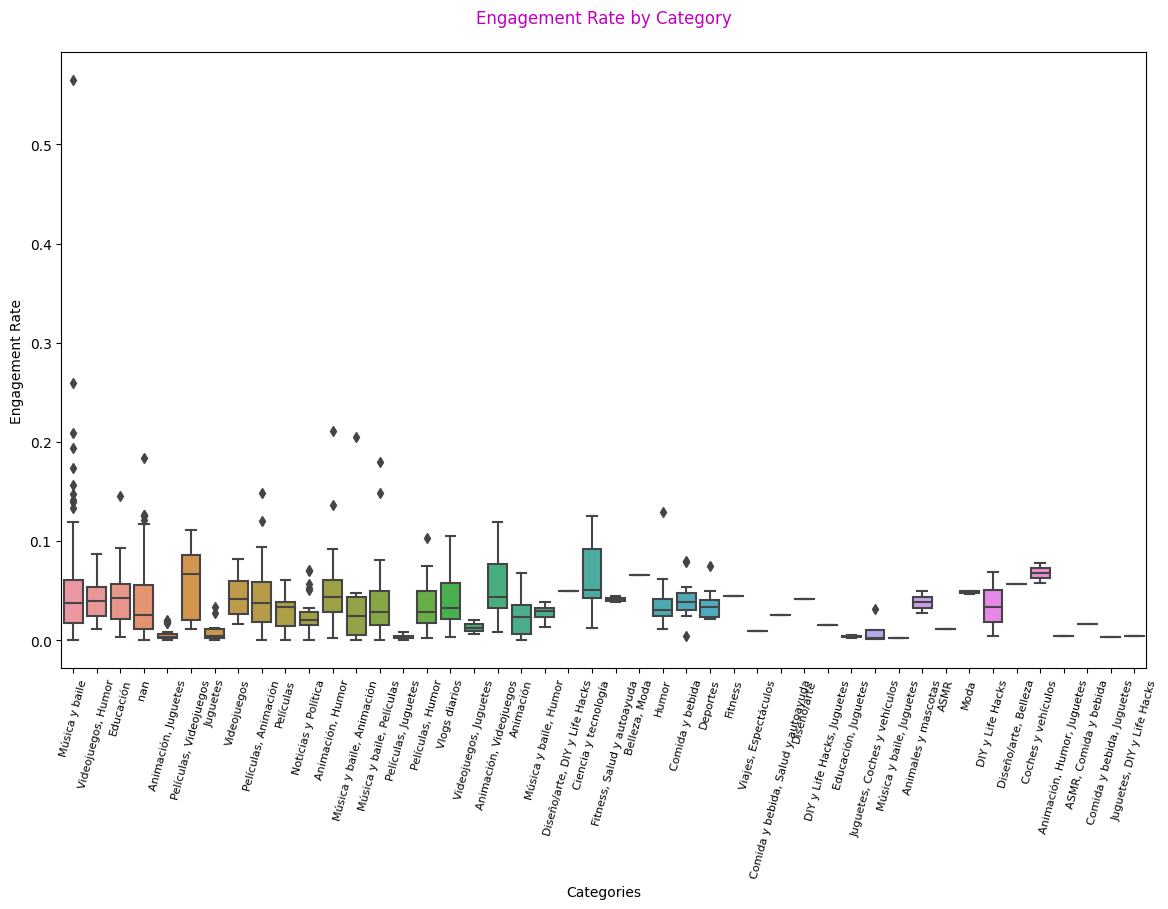

In [ ]:
# 6. What is the engagement rate (likes and comments per visit) for different categories?

# Box Plot

df_yt['Engagement Rate'] = (df_yt['Likes'] + df_yt['Comments']) / df_yt['Visits']

plt.figure(figsize=(14,8))
sns.boxplot(x='Categories', y='Engagement Rate', data=df_yt)
plt.xticks(rotation=75,fontsize=8)
plt.xlabel('Categories')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Category\n', color='m')
plt.show()

# **Insights :**
# It can be seen that category **'Movies and Video games'** has higher median engagement rate. Also, engagement rate is decreasing as we move from left to right (which is rank based).

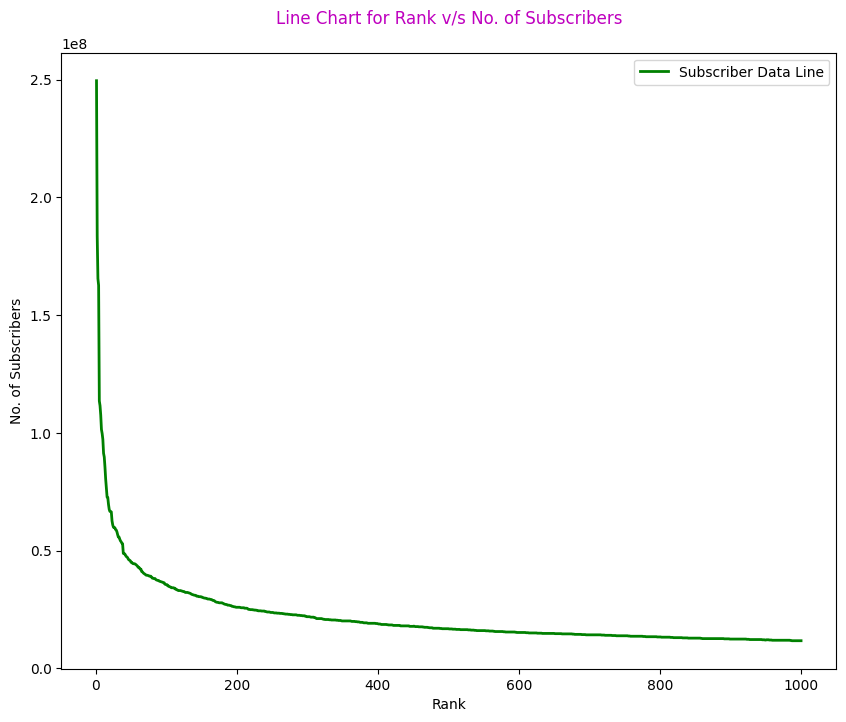

In [ ]:
# 7. How does video rank correlate with the number of subscribers?

# Line Chart

plt.figure(figsize=(10,8))

plt.plot(df_yt['Rank'],df_yt['Suscribers'],color="green",linestyle="-",linewidth=2,label="Subscriber Data Line")
plt.xlabel('Rank')
plt.ylabel('No. of Subscribers')
plt.title('Line Chart for Rank v/s No. of Subscribers\n',color='m')
plt.legend()
plt.show()

# **Insights :**
# It is clearly seen that as the youtubers' ranking decreases, there is sudden deep decrease in no. of subscribers at the beginning but after then they are decreasing slowly.

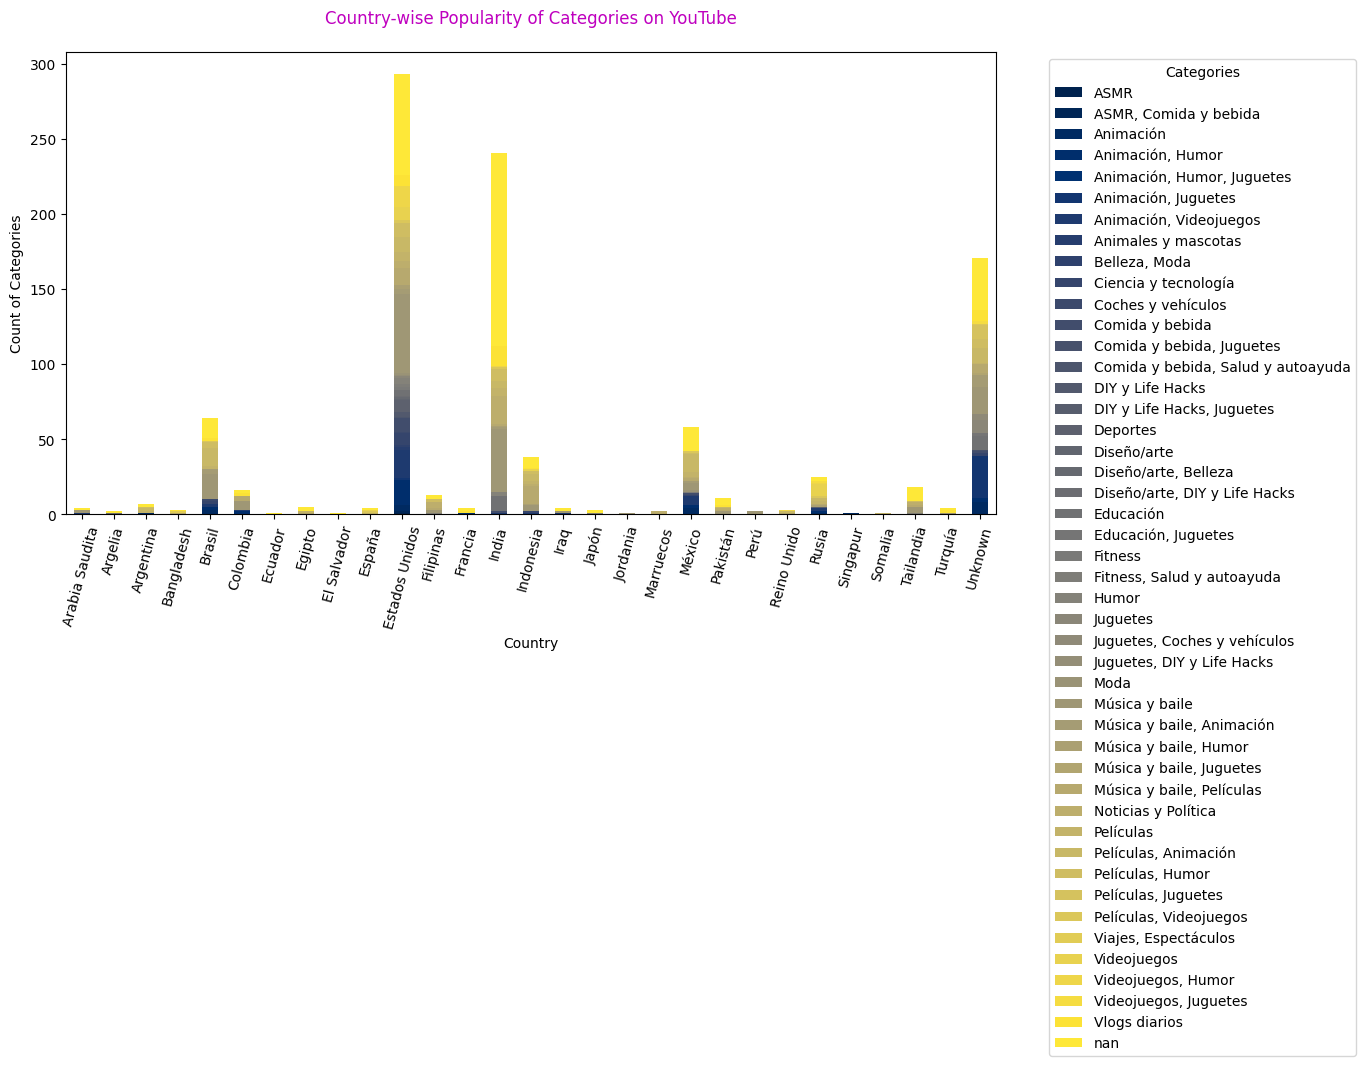

In [ ]:
# 8. What is the country-wise popularity of each category?

# Bar Plot

country_category_popularity = df_yt.groupby(['Country', 'Categories']).size().unstack(fill_value=0)

country_category_popularity.plot(kind='bar', stacked=True, colormap='cividis', figsize=(12, 6))

plt.title('Country-wise Popularity of Categories on YouTube\n', color='m')
plt.xlabel('Country')
plt.ylabel('Count of Categories')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=75)
plt.show()

# **Insights :** From the stacked bar plot,
# It is seen that **'Music and dance'** category is the most popular compared with all others in each country when not considering category **Unknown**.

<Axes: title={'center': 'Grouped Bar Chart for Comments Vs Likes\n Last 10 Data\n'}>

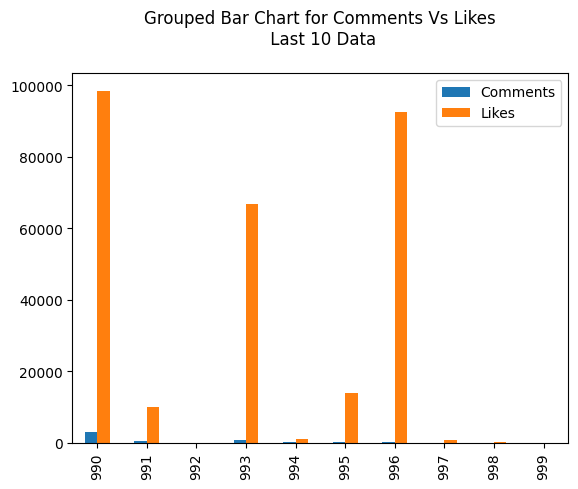

In [ ]:
# 9. Find the relationship bw comments and likes?

# Grouped Bar Plot

df_yt[['Comments','Likes']].tail(10).plot.bar(title="Grouped Bar Chart for Comments Vs Likes\n Last 10 Data\n")

# **Insights :**
# Above plotting states that comments are very much less on videos as compared to likes on videos.

# ➥ MULTIVARIATE ANALYSIS

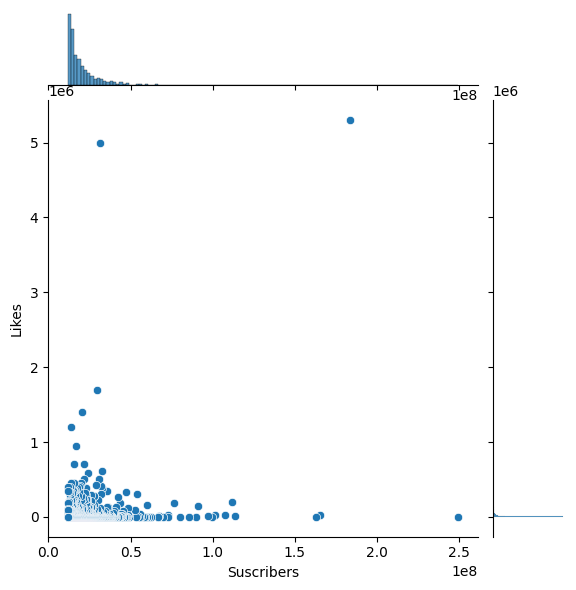

In [ ]:
# 10. Is there a correlation between the number of subscribers a YouTube channel has and the number of likes its videos receive?

# Joint Plot

sns.jointplot(data=df_yt, x=df_yt["Suscribers"], y=df_yt["Likes"])

plt.title('Joint Plot for relationship bw Suscribers & Likes\n',color='m')
plt.show()

# **Insights :**
# This chart shows the dense scatters for the youtube channels having less subscriber count and equal & higher likes count within thier level. Also, the histogram shows that same likes count appears more often for the youtubers with less popularity suggesting a much little correlation.
# Some outliers have also been seen and it is found that one youtube channel with less subscriber count is giving tough competition to the one with higher subscriber count and likes in terms of likes.

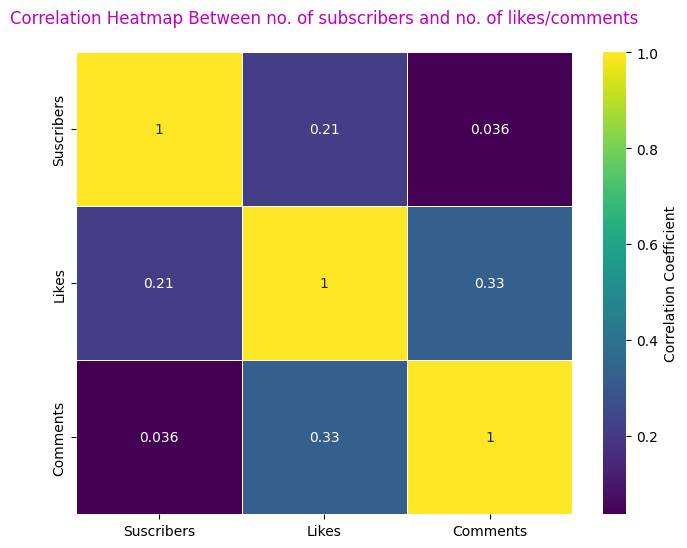

In [ ]:
# 11. Is there a correlation between the number of subscribers and the number of likes/comments?

# Correlation Heatmap

data = df_yt[['Suscribers', 'Likes','Comments']]
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap Between no. of subscribers and no. of likes/comments\n',color='m')
plt.show()

# **Insights :**
# Here, all columns are somewhere correlated to each other since we can see there is no '0' or '-1' count of correlation coefficient in heatmap color bar.
# It is also normal that the yellow areas are a 1:1 ratio since Suscribers=Suscribers, Likes=Likes, etc.
# We are considering our target variable as 'Suscribers' & finding how all other variables are affecting the subscriber count.
# 1. Subscriber & Likes are showing little to no correlation ( corr value - 0.21).
# 2. Subscriber & Comments are showing no correlation ( corr value - 0.036).
# Seeing relationship bw Likes & Comments, they are much correlated as compared with insight no. 1 ( corr value - 0.33).

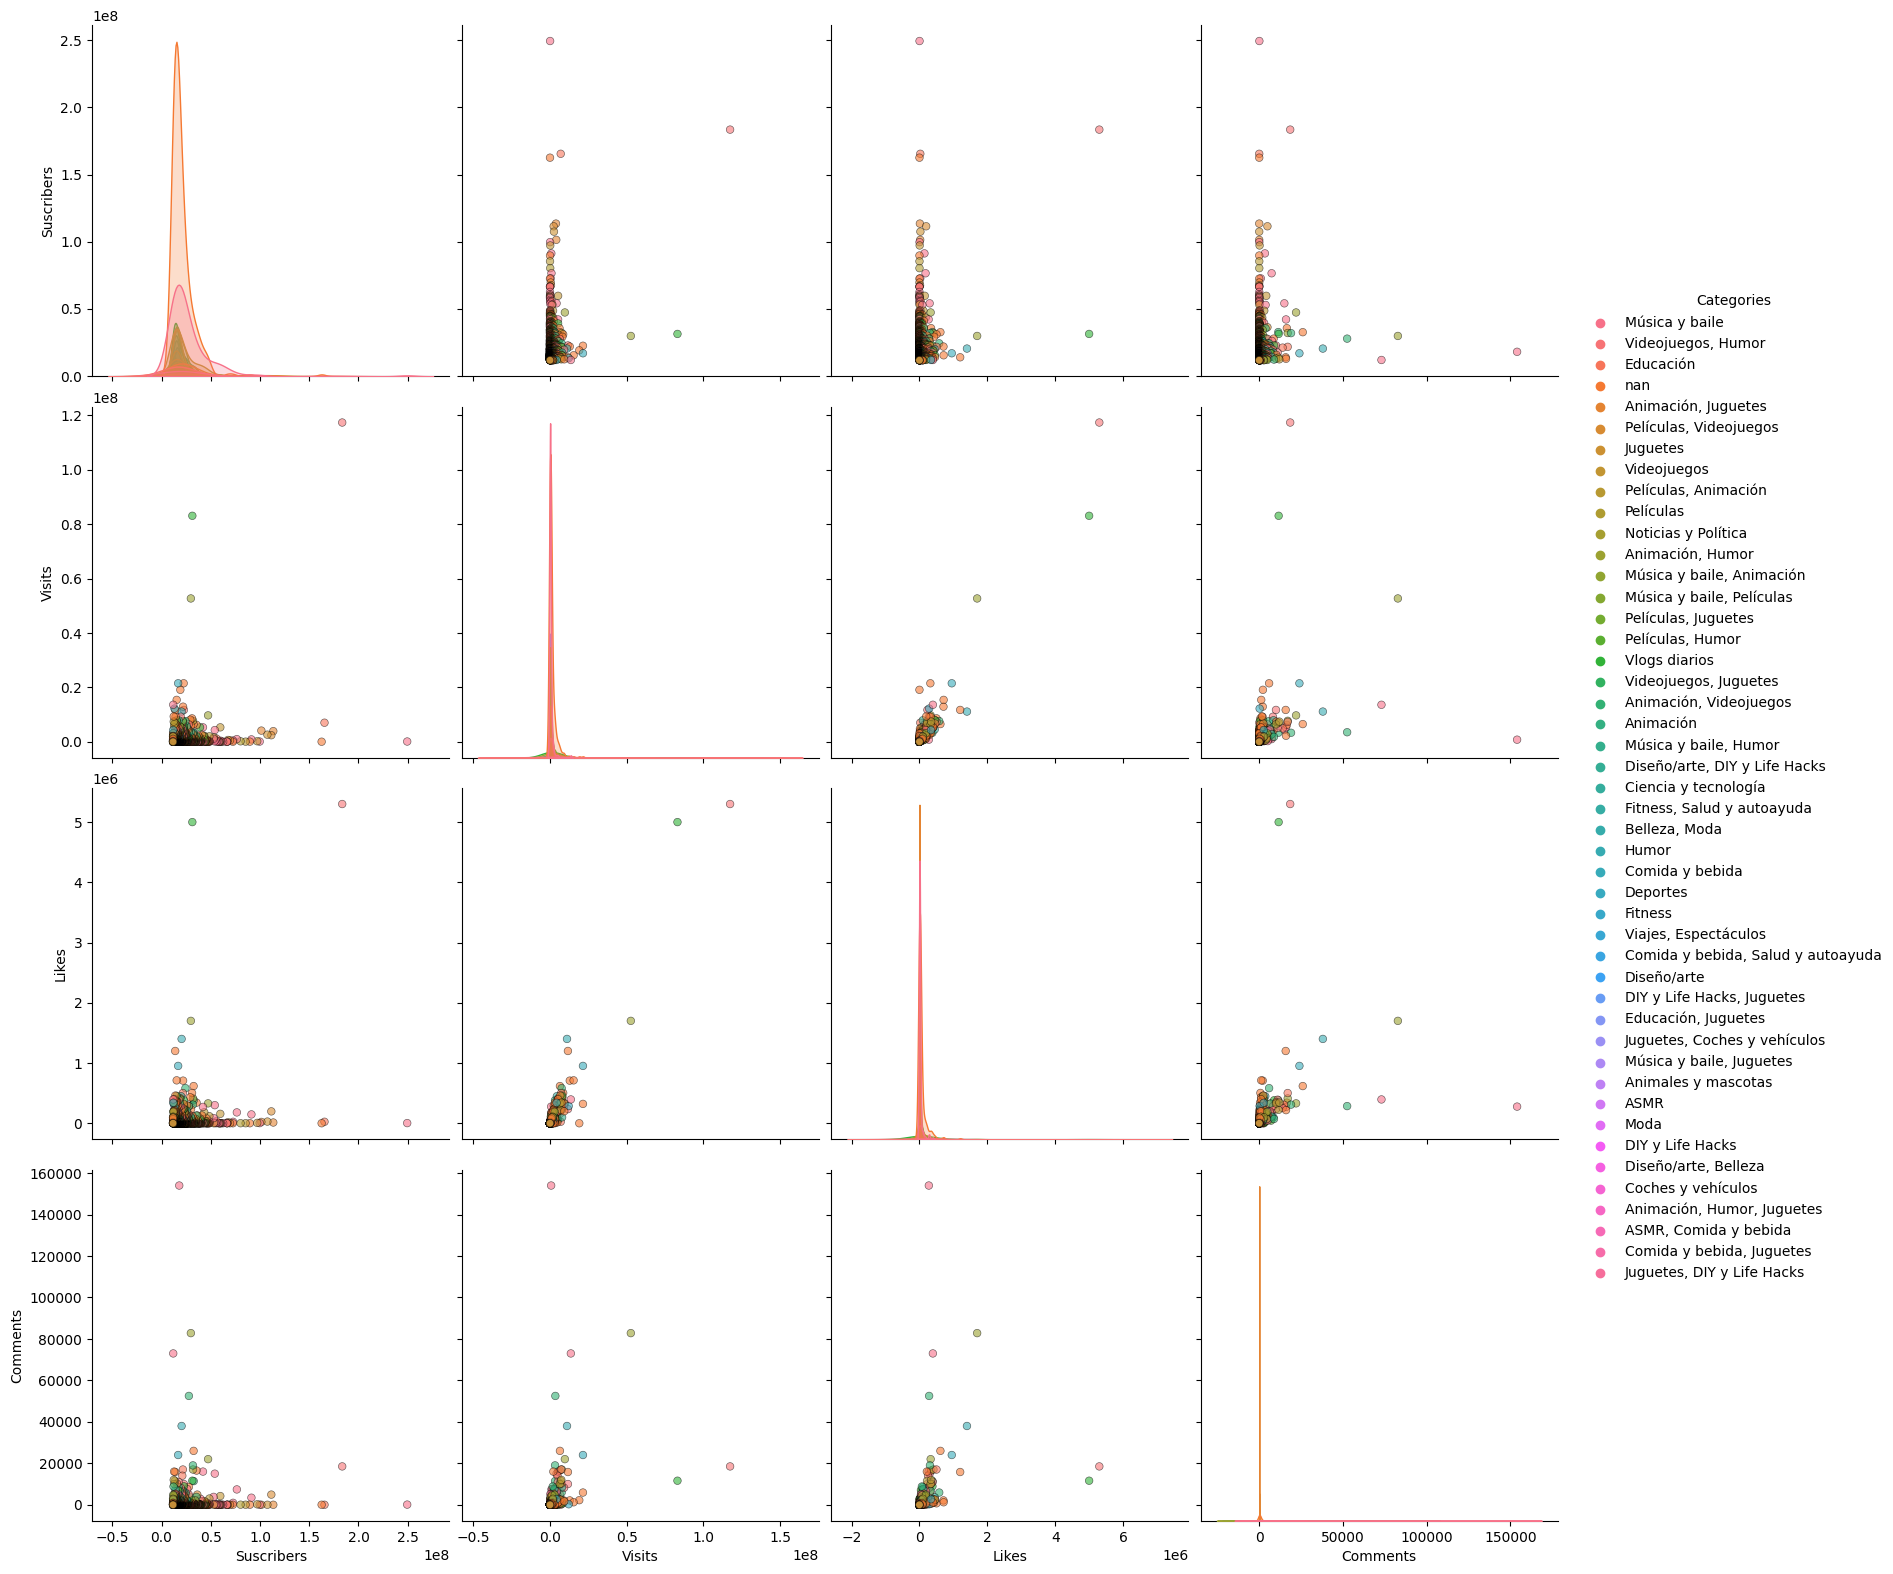

In [ ]:
# 12. Visualize relationships bw numerical columns (Subscribers, Visits, Likes, Comments) and categorize the data by 'Categories?

# Pair Plot

sns.pairplot(df_yt[['Suscribers', 'Visits', 'Likes', 'Comments', 'Categories']], hue='Categories',
             diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'},height = 4)
plt.show()



# **Insights :**
# 1. Subscribers v/s Others - Much little to no correlation is in the plots each time and 'Music and dance' category has more subscriber count.
# 2. Visits v/s Others - A little increasing correlation is seen every time but no correlation with subscribers with few outliers and the same category has more visits.
# 3. Likes v/s Others - A little correlation is seen every time but no correlation with subscribers with few outliers and the same category has more likes count.
# 4. Comments v/s Others - A little correlation is seen every time but no correlation with subscribers with some outliers and the same category has higher no. of comments.

# **FINAL CONCLUSION**
# From the above analysis, the final insights can drawn as -
# Category Popularity:
'Music and dance' is the most popular YouTube category, followed by 'Movies' and 'Animation,' based on the total number of subscribers among channels in those categories.
'Toys, DIY, and Life Hacks' is the least popular category on YouTube.
# Visits, Likes, and Comments:
A small number of channels among the top 10 have the majority of video visits, likes, and comments.
Comments are relatively scarce, even for popular channels, indicating limited viewer engagement in terms of commenting.
# Comments and Popularity:
There is no fixed relationship between the number of comments and a channel's popularity. Some less popular channels have higher comment counts.
# Country-wise Popularity:
'Music and dance' is the most popular category in each country, except when considering the 'Unknown' category.
# Correlations:
Visits show a weak positive correlation with subscribers, with some outliers.
Likes show little to no correlation with subscribers.
Comments have little to no correlation with subscribers.
Likes and comments have a moderate correlation with each other.
# Engagement Rate:
'Movies and Video games' has a higher median engagement rate, and engagement rate generally decreases as channel rank decreases.
# Subscriber Count vs. Rank:
Channels experience a significant drop in subscriber count at the beginning of the ranking, followed by a gradual decline.

# **POSITIVE ASPECTS FOR YOUTUBE**
# Category Popularity
# Engagement Opportunities
# Fair Competition
# Global Popularity

# **STRATEGIES**
# (1) For Comments -
Host Q&A Sessions and Live Streams
#  
Talks on controversial topics( Not recommended )
#  
Use of interactive Polls and Surveys
# (2) For Likes -
Create High-Quality Content
#  
Use Eye-Catching Thumbnails
#  
Tell Viewers What to Expect
# (3) For Channel Visits -
Consistent Upload Schedule
#  
Create Playlists
#  
SEO Optimization, Share on Social Media & Collaboration
# (4) For Overall Popularity -
Consistency & Stay Informed
#  
Engage with the Community
#  
Experiment and Innovate, Promotion & Analyze Data
# (5) YouTube can empower creators through workshops and resources to boost audience engagement, foster comments, and build dedicated communities.
# (6) Offering guidance and assistance to smaller channels, aiding them in garnering subscribers and nurturing channel growth.
# (7) Introduce innovative tools and features to simplify creator-audience interactions and stimulate meaningful discussions.
# (8) Elevate content diversity by showcasing and recommending videos from less explored categories, granting them wider visibility.
# (9) To facilitate fuel collaborations among creators, allowing them to mutually promote their channels and broaden their viewer base.
# (10) Creators can maximize their impact by delving into popular niches like 'Music and Dance,' 'Movies and Animation' to attract a larger subscriber base.
# (11) To elevate the encouragement for likes ,commments, subscribe and sharing active participation from the audience.
# (12) Creators should strategically align their content with trending categories across different countries to expand their reach.

# --------------------------------------------------------------------------------------------------------------------------------------------